<a href="https://colab.research.google.com/github/AkshayYede/Housing-Price-Prediction/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary**

This project focuses on fetching, exploring, and preparing a housing dataset for analysis. The dataset, sourced from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, contains information about California housing data. The goal is likely to develop a predictive model (e.g., for house prices) by leveraging various features, such as median income, total rooms, population, and proximity to the ocean.

The script includes:

Dataset Download: Fetches the housing dataset in .tgz format from the provided URL.
Dataset Extraction: Unzips the dataset and saves it locally for further processing.
Loading Data: Reads the data into a pandas DataFrame and displays the initial rows for inspection.

#**Problem Statement**

The housing market in California is one of the most dynamic and influential in the United States, characterized by significant variation in property prices across regions. Understanding the factors that drive these variations is essential for stakeholders such as real estate developers, urban planners, policymakers, and even prospective homebuyers. This project focuses on analyzing and predicting the **median house value** for California districts using a publicly available dataset.  

The dataset includes essential features such as geographical attributes (longitude and latitude), housing characteristics (total rooms, total bedrooms, population, households), socio-economic factors (median income), and proximity to the ocean. These attributes provide a comprehensive view of how different variables interplay to determine housing prices. The primary objective is to build a machine learning model that can accurately predict housing prices and provide actionable insights into the housing market dynamics.  

Several challenges need to be addressed in this project. For instance, the dataset contains missing values in features such as `total_bedrooms`, which require appropriate handling to avoid biasing the results. Additionally, some features, like `median_income` and `ocean_proximity`, may have non-linear relationships with the target variable, necessitating careful preprocessing and feature engineering. Exploratory Data Analysis (EDA) will be critical to uncover patterns, correlations, and outliers that may influence the modeling process.  

The predictive model developed in this project will serve two purposes. First, it will help understand the relative importance of various features, such as income levels and population density, in determining housing prices. Second, it will provide a tool for making reliable predictions about housing prices in areas where historical data may be incomplete or unavailable. Such predictions can guide real estate investments, zoning policies, and infrastructure development.

This project will follow an end-to-end machine learning workflow. Starting with data collection, cleaning, and exploration, the analysis will proceed to feature engineering, model selection, and hyperparameter tuning. Various regression models, including Linear Regression, Decision Trees, and Ensemble Methods like Random Forests and Gradient Boosting, will be evaluated for their accuracy and interpretability. Model performance will be assessed using appropriate metrics such as Mean Squared Error (MSE) and R².

Ultimately, this project aims to offer practical insights into the California housing market while demonstrating the application of machine learning techniques in real-world problems. The findings and models can be extended to other regions or adapted to analyze different aspects of the housing market, contributing to a data-driven approach to urban development and resource allocation.  

By leveraging this predictive approach, the project not only addresses a key challenge in real estate pricing but also underscores the importance of data-driven decision-making in shaping sustainable communities.

# **1. Know Your Data**

## Importing Libraries

In [195]:
# Importing necessary libraries

# Core Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization tools
from pandas.plotting import scatter_matrix

# Data download and compression handling
import os  # For operating system interactions
import tarfile  # For extracting compressed files
from six.moves import urllib  # For downloading files from URLs

# Statistical tools
from scipy import stats
from scipy.stats import randint

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_squared_error

# Pipelines and Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin

# Model Saving and Loading
import joblib

# Compression utilities
from zlib import crc32  # For checksum computations

## Loading Dataset

In [196]:
# Updated URL with the correct link
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/refs/heads/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")

    # Downloading the dataset
    print("Downloading housing dataset...")
    urllib.request.urlretrieve(housing_url, tgz_path)
    print("Download complete.")

    # Extracting the dataset
    print("Extracting dataset...")
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("Extraction complete.")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch the dataset and extract it
fetch_housing_data()

# Load the dataset
housing = load_housing_data()

Download complete.
Extracting dataset...
Extraction complete.


## Dataset View

In [197]:
# Randomly selects 5 rows from the DataFrame.
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7523,-118.24,33.91,38.0,745.0,152.0,721.0,160.0,1.8750,102900.0,<1H OCEAN
9401,-122.56,37.92,37.0,1926.0,290.0,721.0,298.0,8.9248,500001.0,NEAR BAY
17990,-121.95,37.28,52.0,777.0,148.0,362.0,144.0,4.0208,262500.0,<1H OCEAN
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,305600.0,<1H OCEAN
7160,-118.16,34.04,11.0,852.0,215.0,806.0,202.0,1.3971,134400.0,<1H OCEAN


## Basic Data Exploration

In [198]:
# Dimensions of the DataFrame (rows, columns)
housing.shape

(20640, 10)

In [199]:
# Total number of elements in the DataFrame
housing.size

206400

In [200]:
# dataset information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [201]:
# Checking the data types of each column
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [202]:
# checking for the null values
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


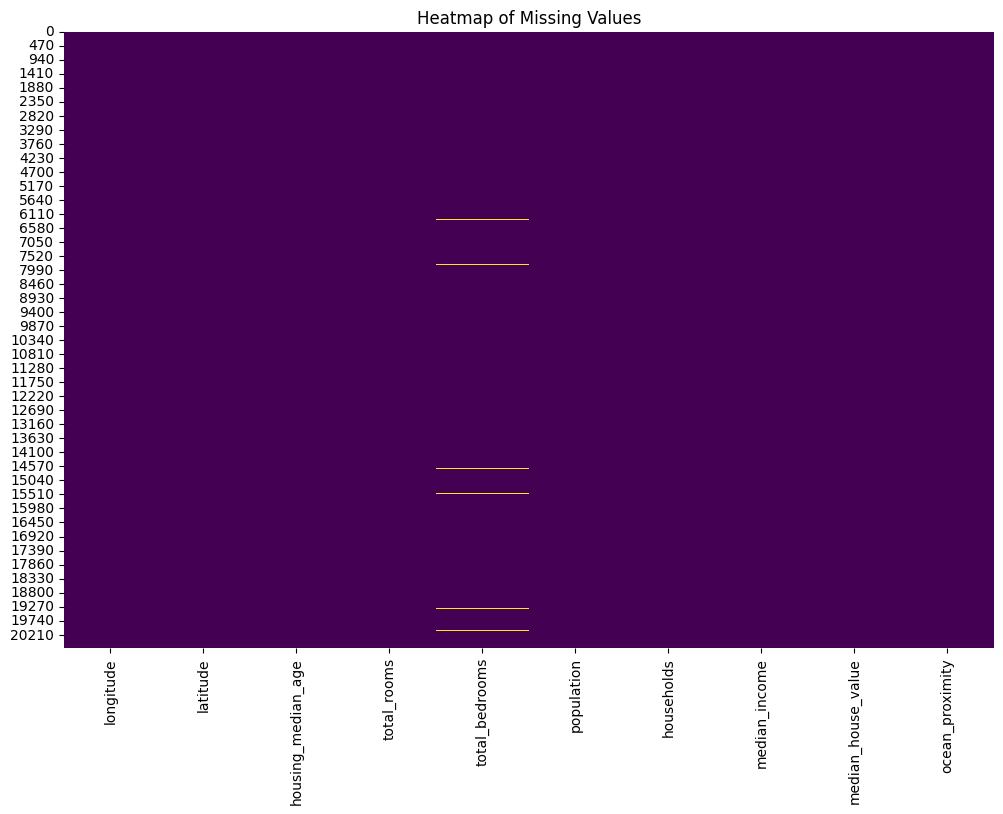

In [203]:
plt.figure(figsize=(12, 8))
sns.heatmap(housing.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [204]:
housing["ocean_proximity"].value_counts() # gives me what categories is there and how many rows has this category

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [205]:
# description of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **2. Exploratory Data Analysis**

## Histogram of Numerical Attributes

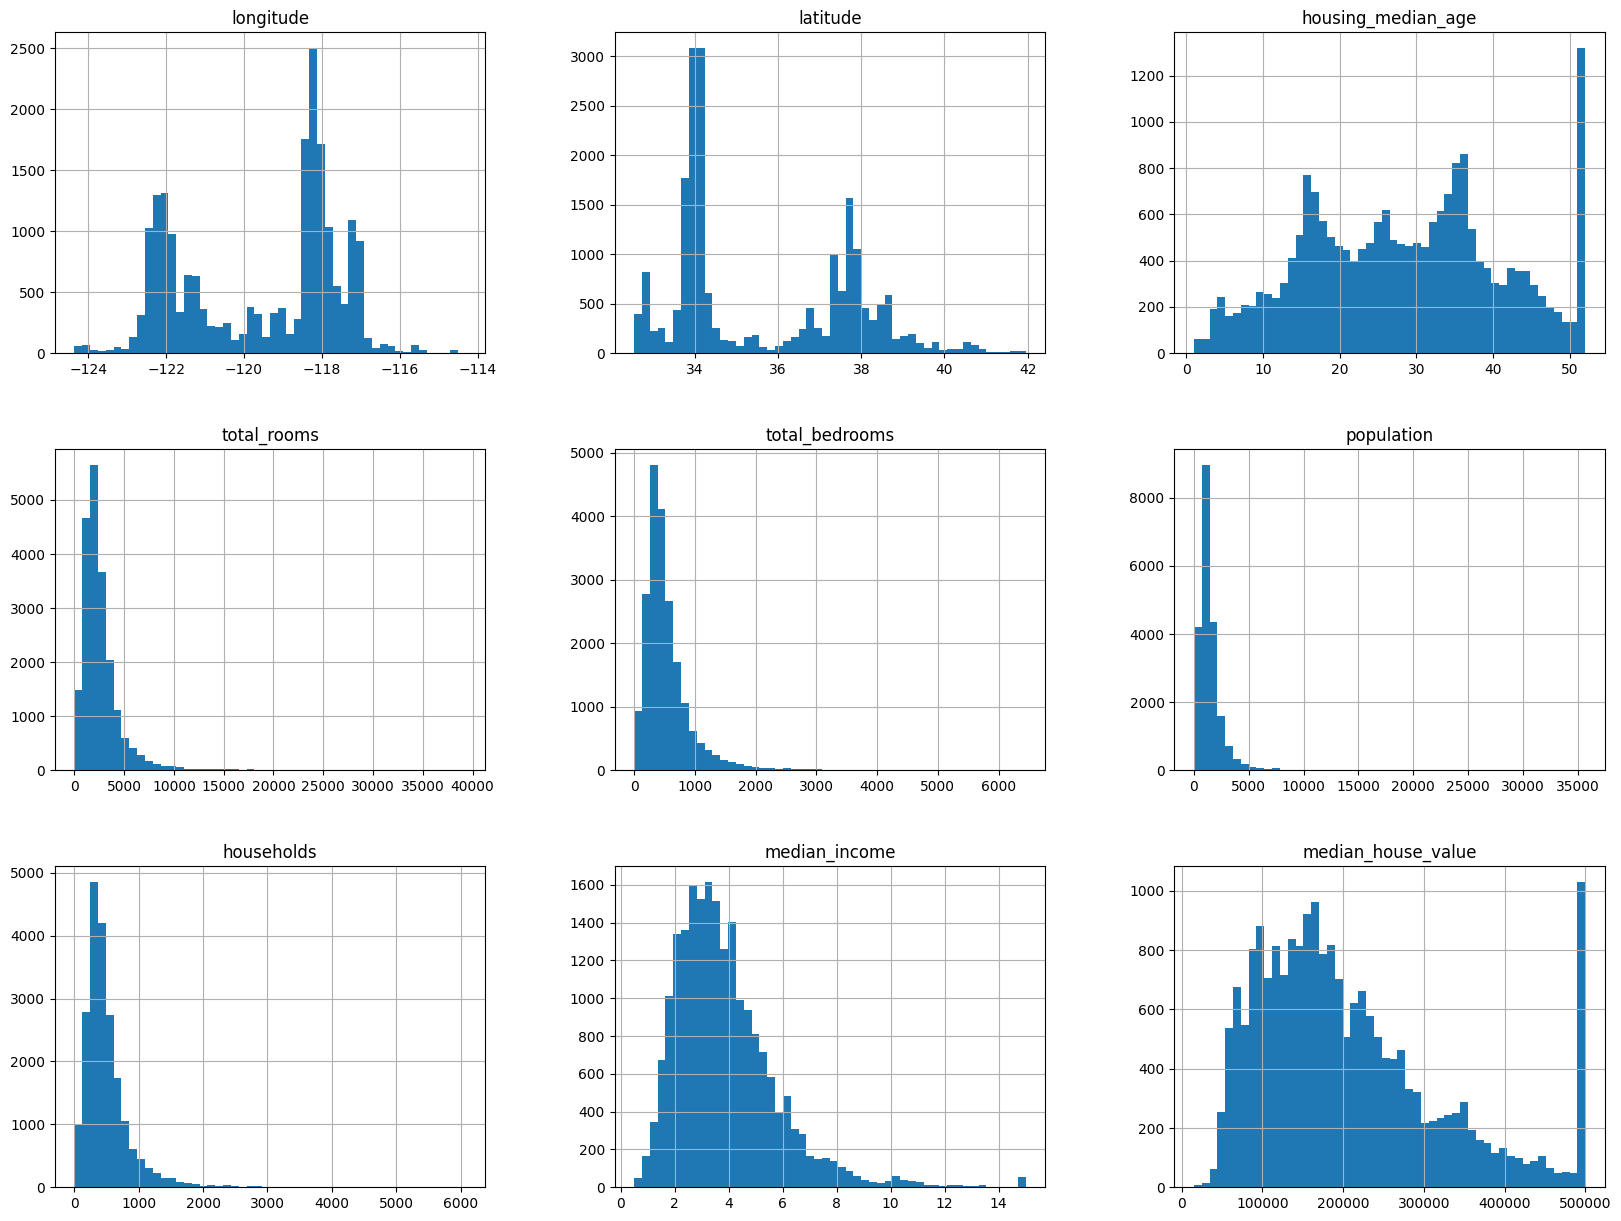

In [206]:
# plotting a histogram for each numerical attribute
housing.hist(bins=50 , figsize=(20,15))
plt.show()

## House Value Distribution

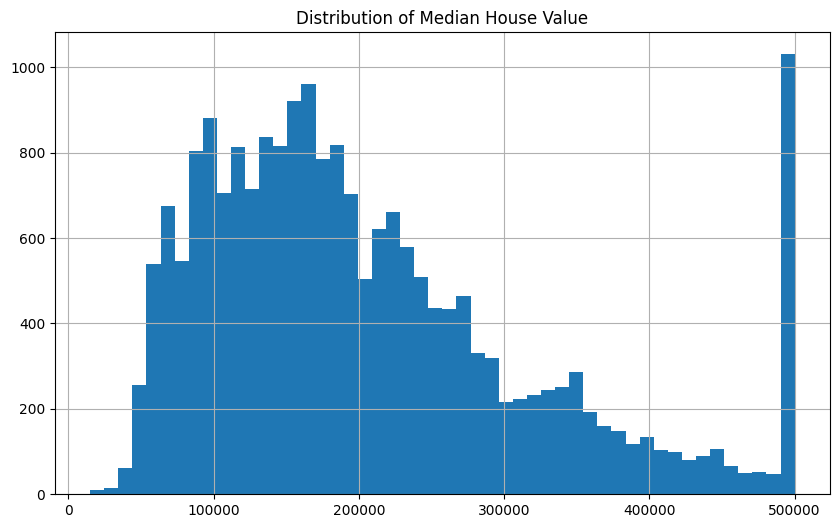

In [207]:
# Plotting a histogram for 'median_house_value' with 50 bins and a specified figure size
housing['median_house_value'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Median House Value')
plt.show()

## House Value by Ocean Proximity

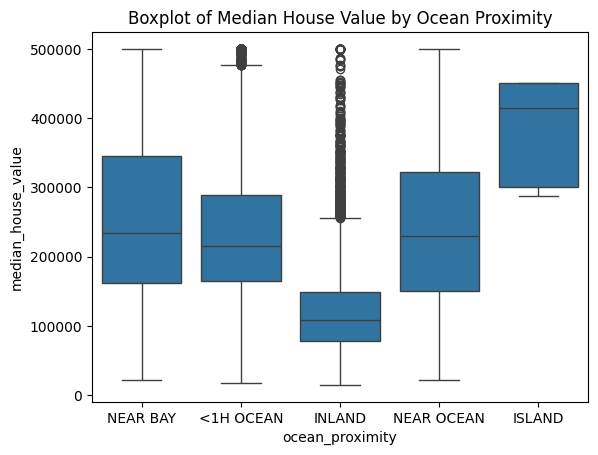

In [208]:
# distribution of median house values for each category of 'ocean_proximity'
sns.boxplot(data=housing, x='ocean_proximity', y='median_house_value')
plt.title('Boxplot of Median House Value by Ocean Proximity')
plt.show()

## Income vs Median House Value

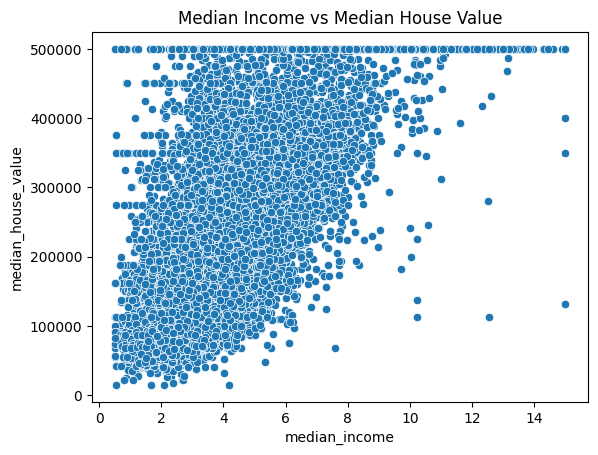

In [209]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing)
plt.title('Median Income vs Median House Value')
plt.show()

## Ocean Proximity Distribution

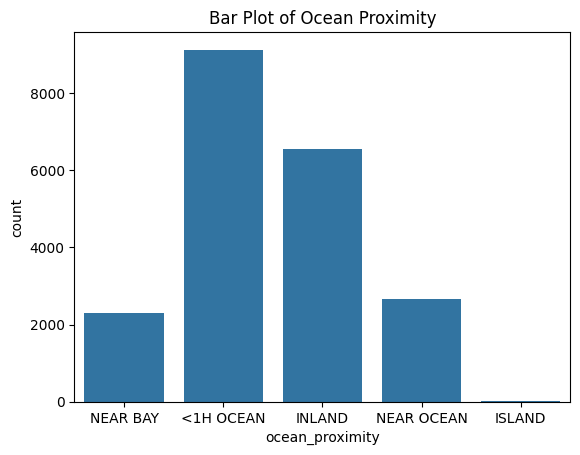

In [210]:
sns.countplot(x='ocean_proximity', data=housing)
plt.title('Bar Plot of Ocean Proximity')
plt.show()

## Correlation Heatmap

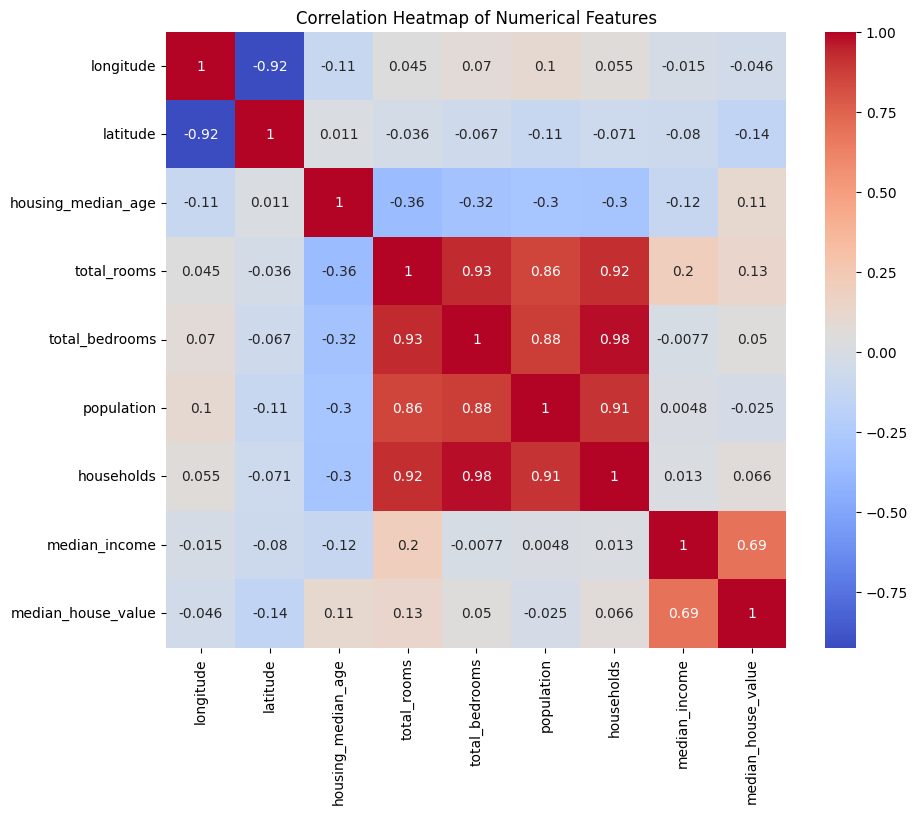

In [211]:
# Remove object (categorical) columns before calculating correlation
housing_numerical = housing.select_dtypes(include=[np.number])  # Select only numerical columns
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_numerical.corr(), annot=True, cmap='coolwarm')  # Use only numerical columns for correlation
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Pairplot

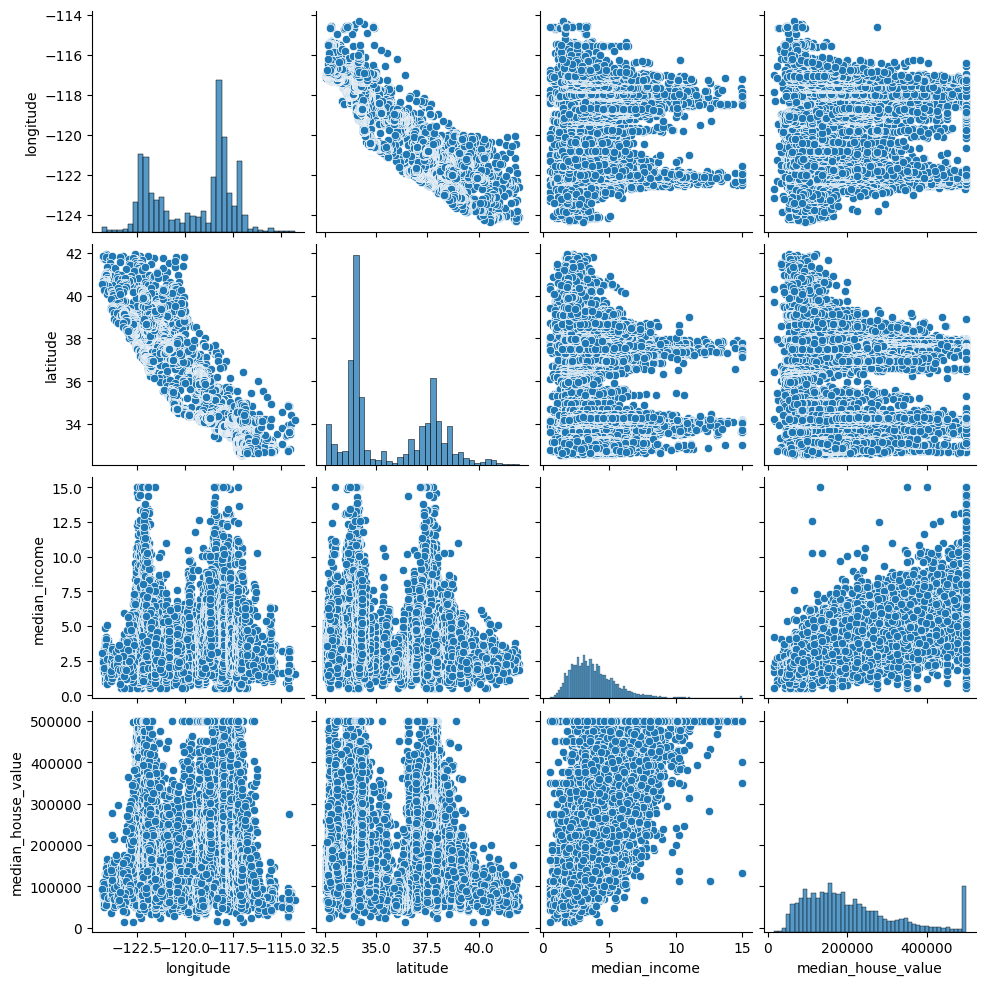

In [212]:
sns.pairplot(housing[['longitude', 'latitude', 'median_income', 'median_house_value']])
plt.show()

# **3. Train Test Split**

## Classic Method

In [213]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [214]:
train_set, test_set = split_train_test(housing, 0.2)
print('train_set: '+str(len(train_set)))
print('test_set: '+str(len(test_set)))

train_set: 16512
test_set: 4128


In [215]:
# Splitting the dataset into training and testing sets
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

## Hashing

In [216]:
def test_set_check(identifier , test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [217]:
def test_set_check(identifier , test_ratio):
    # Convert identifier to integer only if it's not NaN
    if not np.isnan(identifier):
        return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    else:
        # Handle NaN values, for example, by assigning them to the training set
        return False

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

## Feature Engineering for Sampling

<Axes: >

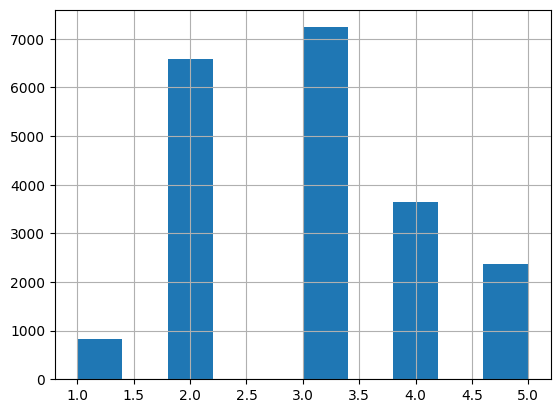

In [218]:
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0,1.5,3.0,4.5,6,np.inf], labels = [1,2,3,4,5])
housing["income_cat"].hist()

In [219]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Reset the index of the 'housing' DataFrame before splitting:
housing = housing.reset_index(drop=True)  # drop=True avoids adding old index as a column

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [220]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [221]:
for set_ in (strat_train_set, strat_test_set): # Back to original data
    set_.drop("income_cat", axis=1, inplace=True)

#  **4. Exploration**

In [222]:
housing = strat_train_set.copy()

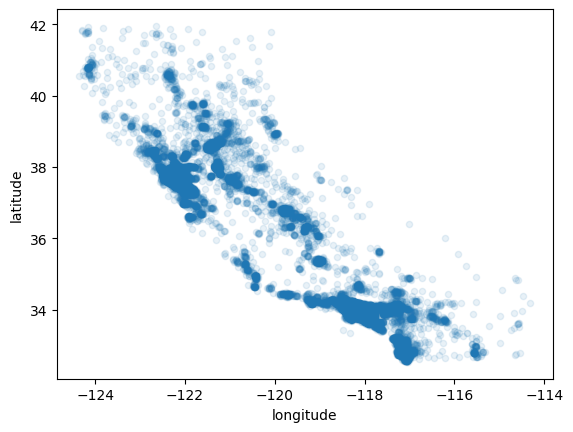

In [223]:
housing.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

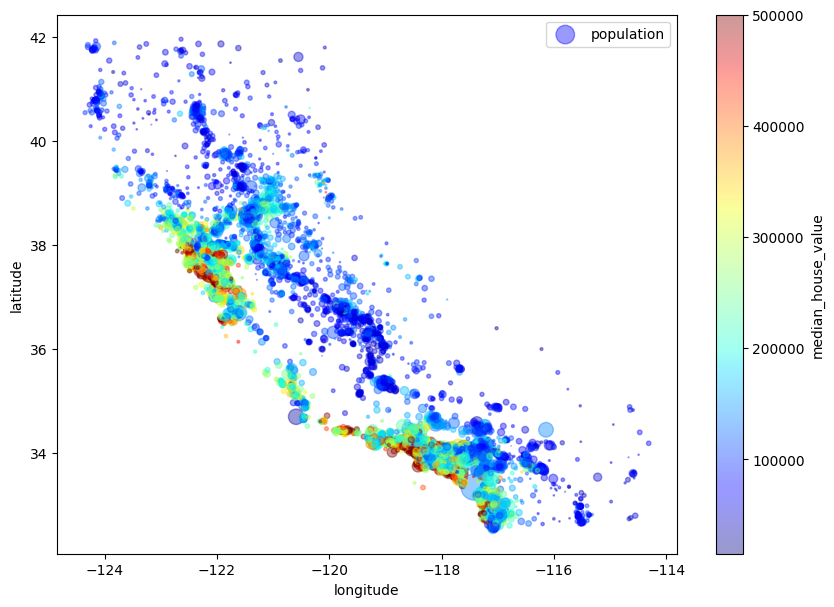

In [224]:
housing.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.4,
            s= housing["population"]/100, label="population", figsize = (10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

# **5. Looking for Correlations**

In [225]:
housing.drop(["ocean_proximity"], axis=1, inplace=True)

In [226]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


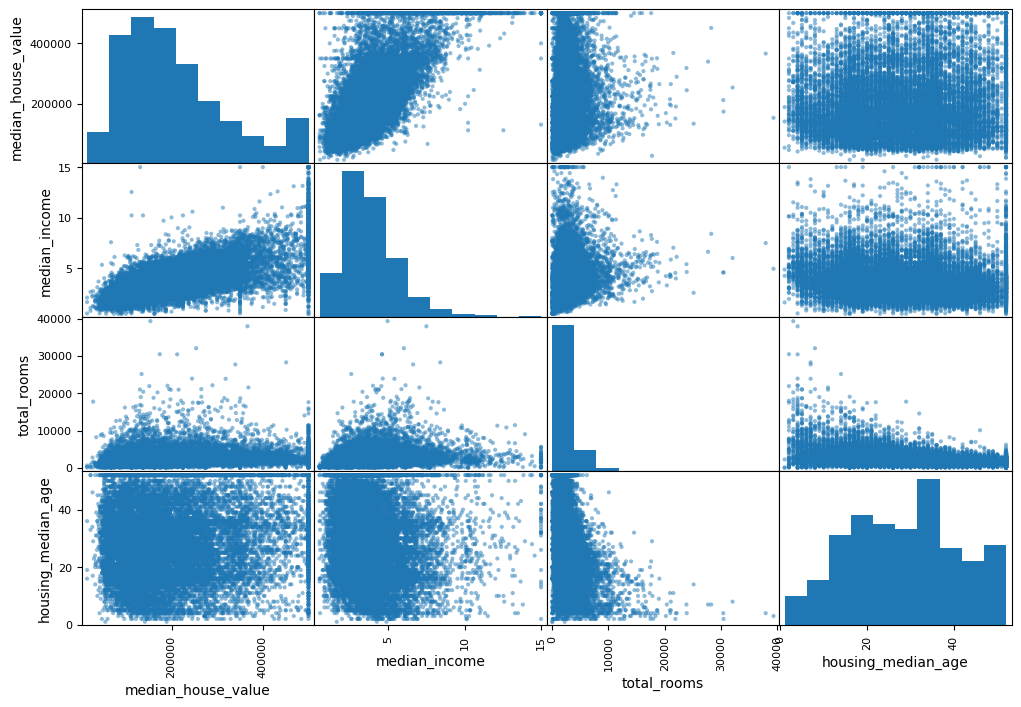

In [227]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

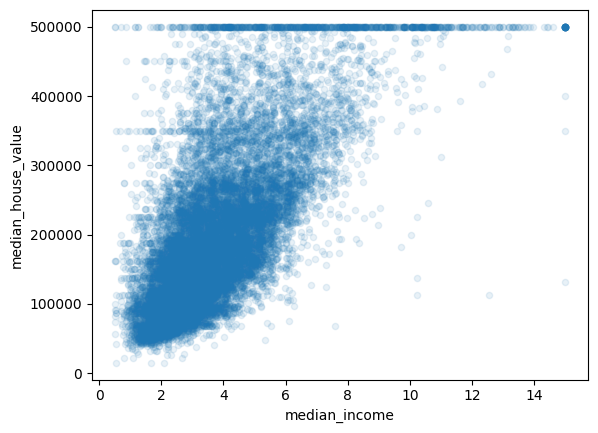

In [228]:
housing.plot(kind="scatter" , x="median_income" , y= "median_house_value", alpha = 0.1)
plt.show()

In [229]:
housing["rooms_per_household"] = housing["total_rooms"]/ housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]

In [230]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


# **6. Preperations**

In [231]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Handle Missing Values

In [232]:
imputer = SimpleImputer(strategy = "median") # median is only for numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [233]:
imputer.statistics_  # the median of each attribute

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [234]:
x = imputer.transform(housing_num) # replacing missing values with medians, x is a numpy array
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

## Encoding Categorical Variables

In [235]:
# Text and categorical variables
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [236]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [237]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [238]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [239]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [240]:
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs for hyperparameter tuning
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Pipelines

In [241]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [242]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline,num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# **7. Select and Train a Model**

In [243]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [244]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [245]:
print("labels:", list(some_labels))

labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [246]:
# evaluating

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse) # underfitting ------> find a more complex model

68627.87390018745


In [247]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [248]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse= np.sqrt(tree_mse)
print(tree_rmse) # overfitting

0.0


In [249]:

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [250]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse= np.sqrt(tree_mse)
print(forest_rmse) # overfitting

0.0


## Better Evaluation using Cross_Validation

In [251]:

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [252]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

scores:  [72904.47558339 68587.82432443 69865.96303697 71704.76144562
 71976.87836084 77932.74650394 68142.63397842 72549.73612989
 67322.98996351 70672.77399857]
mean:  71166.07833255759
standard deviation:  2901.0945327345803


In [253]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean:  69104.07998247063
standard deviation:  2880.3282098180694


In [254]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-lin_scores)
display_scores(forest_rmse_scores)

scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean:  69104.07998247063
standard deviation:  2880.3282098180694


## Saving Results

In [255]:
# Assuming `lin_reg` is the trained model
joblib.dump(lin_reg, "lin_reg_model.pkl")
joblib.dump(tree_reg, "tree_reg_model.pkl")
joblib.dump(forest_reg, "forest_reg_model.pkl")

['forest_reg_model.pkl']

In [256]:
# Load the model from the file
lin_reg_loaded = joblib.load("lin_reg_model.pkl")

## Grid Search

In [257]:
param_grid = [
    {'n_estimators': [3,10,30, 50], 'max_features': [2,4,6,8,15]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 15],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [258]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

In [259]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=50)

In [260]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64081.31992508309 {'max_features': 2, 'n_estimators': 3}
54905.68745633311 {'max_features': 2, 'n_estimators': 10}
52703.616509720196 {'max_features': 2, 'n_estimators': 30}
52095.43796304575 {'max_features': 2, 'n_estimators': 50}
60001.60907903721 {'max_features': 4, 'n_estimators': 3}
52476.13185219669 {'max_features': 4, 'n_estimators': 10}
50375.937069496846 {'max_features': 4, 'n_estimators': 30}
49765.27779693988 {'max_features': 4, 'n_estimators': 50}
59057.79963217976 {'max_features': 6, 'n_estimators': 3}
52782.49835177764 {'max_features': 6, 'n_estimators': 10}
50455.279165857006 {'max_features': 6, 'n_estimators': 30}
49719.32525654118 {'max_features': 6, 'n_estimators': 50}
58582.94096530451 {'max_features': 8, 'n_estimators': 3}
52256.27159032237 {'max_features': 8, 'n_estimators': 10}
50320.099382628476 {'max_features': 8, 'n_estimators': 30}
49645.54585769034 {'max_features': 8, 'n_estimators': 50}
59092.91190828815 {'max_features': 15, 'n_estimators': 3}
52946.83715780

## Randomized Search

In [261]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eebc9c68fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eebc9c6ba00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [262]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [263]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [264]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

# **8. Analyze the Best Models**

In [265]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.13721236e-02, 6.28935545e-02, 4.30092772e-02, 1.64086555e-02,
       1.55670107e-02, 1.64745016e-02, 1.53753328e-02, 3.45190341e-01,
       5.95258394e-02, 1.10738856e-01, 6.97457058e-02, 8.67185471e-03,
       1.58662678e-01, 6.67961748e-05, 2.68890007e-03, 3.60857368e-03])

In [266]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34519034100319007, 'median_income'),
 (0.15866267751808202, 'INLAND'),
 (0.11073885589189819, 'pop_per_hhold'),
 (0.07137212359389712, 'longitude'),
 (0.06974570580531124, 'bedrooms_per_room'),
 (0.06289355447798799, 'latitude'),
 (0.05952583935728965, 'rooms_per_hhold'),
 (0.04300927718434756, 'housing_median_age'),
 (0.01647450156625561, 'population'),
 (0.016408655481155894, 'total_rooms'),
 (0.015567010725199514, 'total_bedrooms'),
 (0.015375332753137499, 'households'),
 (0.008671854710510336, '<1H OCEAN'),
 (0.003608573683092269, 'NEAR OCEAN'),
 (0.002688900073839445, 'NEAR BAY'),
 (6.679617480568294e-05, 'ISLAND')]

# **9. Evaluating on the Test Set**

In [267]:
final_model = rnd_search.best_estimator_

In [268]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [269]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45009.73121871, 48874.43992557])